In [65]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO 
from graphviz import Source
%matplotlib inline

sns.set_style('darkgrid')

/Users/anupprakash/Anaconda4/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data['Urban'] = LabelEncoder().fit_transform(data.Urban)

In [5]:
data['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int64

In [6]:
data['Undergrad'] = LabelEncoder().fit_transform(data['Undergrad'])

In [7]:
data['Marital.Status'] = LabelEncoder().fit_transform(data['Marital.Status'])

In [8]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [10]:
corr = data.corr()

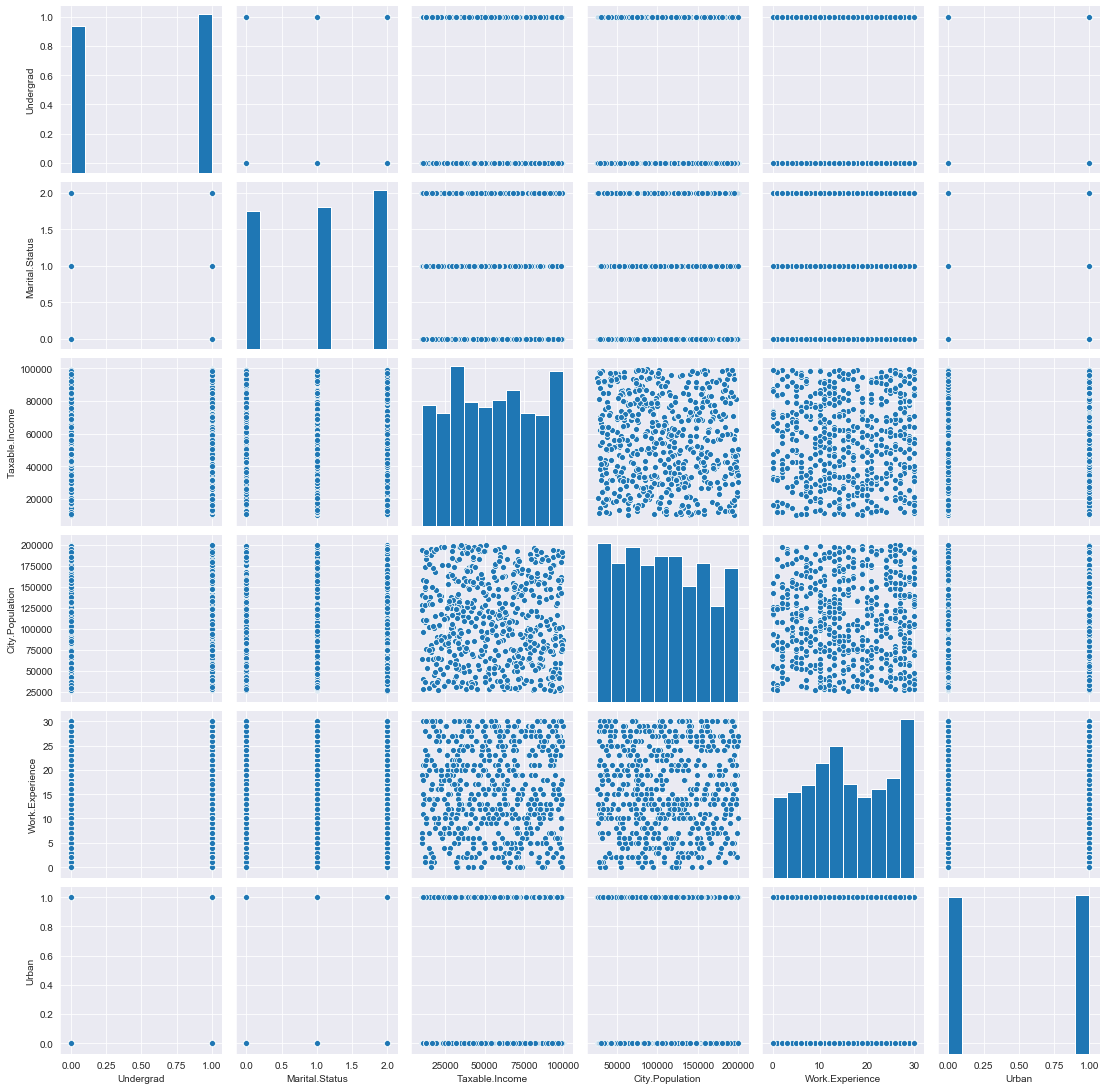

In [11]:
sns.pairplot(data= data)

plt.show()

In [12]:
data['Fraud']= 0

for x in range(0,len(data['Taxable.Income'])):
    if(data['Taxable.Income'].iloc[x]<=30000):
        data['Fraud'].iloc[x] = 1
    else:
        data['Fraud'].iloc[x] = 0

In [13]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


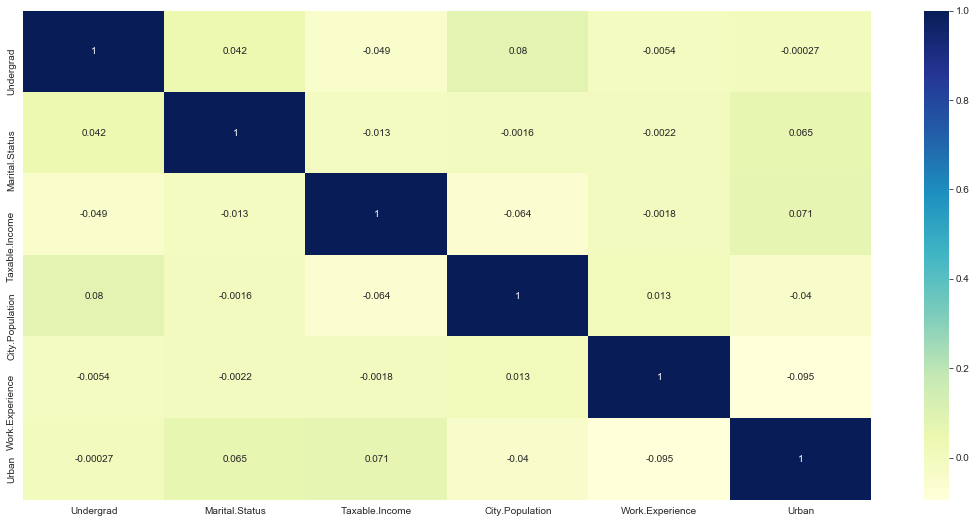

In [14]:
plt.figure(figsize=(19,9))

sns.heatmap(corr,annot=True,cmap = 'YlGnBu')

plt.show()

In [15]:
# we can see that no columns are correlated with each other
# so can use all the columns to make Randorm Forest Prediction

In [16]:
def Training(data):
    xTrain,xTest ,yTrain,yTest = train_test_split(data.drop('Fraud',1),data.Fraud,test_size=0.2)
    ss = SMOTE(k_neighbors= 3)
    xTrain,yTrain = ss.fit_sample(xTrain,yTrain)
    dt = DecisionTreeClassifier(criterion= 'entropy')
    dt = dt.fit(xTrain,yTrain)
    pred = dt.predict(xTest)
    
    score = pd.DataFrame({'TrainingScore':dt.score(xTrain,yTrain),
                         'TestingScore':dt.score(xTest,yTest),
                         'AccuracyScore':accuracy_score(yTest,pred)},index=[0])
    
    return score

In [17]:
sc = StandardScaler().fit(data.drop('Fraud',1))

In [18]:
sc = sc.transform(data.drop('Fraud',1))

In [19]:
FraudData = pd.DataFrame(sc,columns = data.columns[:-1])

In [20]:
FraudData.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,0.520362,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,-0.821464,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,-0.698292,1.033109,1.634639,0.993355
3,0.960769,1.160800,-0.191666,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,0.985129,-1.630532,1.408261,-1.006689


In [21]:
FraudData['Fraud'] = data.Fraud

In [22]:
FraudData.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,-1.040833,1.160800,0.520362,-1.178521,-0.629143,0.993355,0
1,0.960769,-1.274445,-0.821464,0.508500,0.276370,0.993355,0
2,-1.040833,-0.056822,-0.698292,1.033109,1.634639,0.993355,0
3,0.960769,1.160800,-0.191666,1.696831,-0.063197,0.993355,0
4,-1.040833,-0.056822,0.985129,-1.630532,1.408261,-1.006689,0
5,-1.040833,-1.274445,-0.835633,0.153280,-1.761033,-1.006689,0
6,-1.040833,-1.274445,1.075073,-0.559289,-0.855521,0.993355,0
7,0.960769,1.160800,0.288952,0.451843,-1.421466,0.993355,0
8,-1.040833,1.160800,1.081261,-0.125809,-0.402764,0.993355,0
9,0.960769,-1.274445,1.640135,0.938286,-1.308277,0.993355,0


In [23]:
score = Training(FraudData)

In [24]:
score

,TrainingScore,TestingScore,AccuracyScore
0,1.0,1.0,1.0


In [72]:
def RandFor(data):
    xTrain,xTest ,yTrain,yTest = train_test_split(data.drop('Fraud',1),data.Fraud,test_size=0.2)
    ss = SMOTE(k_neighbors= 3)
    xTrain,yTrain = ss.fit_sample(xTrain,yTrain)
    
    rf = RandomForestClassifier(criterion= 'entropy',n_estimators= 10,max_depth= 4)
    dt = rf.fit(xTrain,yTrain)
    pred = dt.predict(xTest)
    
    col = data.columns[:-1]
    
    score = pd.DataFrame({'TrainingScore':dt.score(xTrain,yTrain),
                         'TestingScore':dt.score(xTest,yTest),
                         'AccuracyScore':accuracy_score(yTest,pred)}
                         ,index=[0],
)
    print(confusion_matrix(yTest,pred))

    
    return score

In [73]:
score = RandFor(FraudData)

[[97  0]
 [ 1 22]]


In [74]:
score

,TrainingScore,TestingScore,AccuracyScore
0,1.0,0.991667,0.991667


In [75]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, 
                               stop= X_set[:,0].max()+1, step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1,
                               step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),
              X2.ravel()]).T).reshape(X1.shape)
             , alpha=0.75,
             cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("red","green"))
                (i),label = j)
    
plt.title("Decision Tree(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

NameError: name 'X_test' is not defined

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

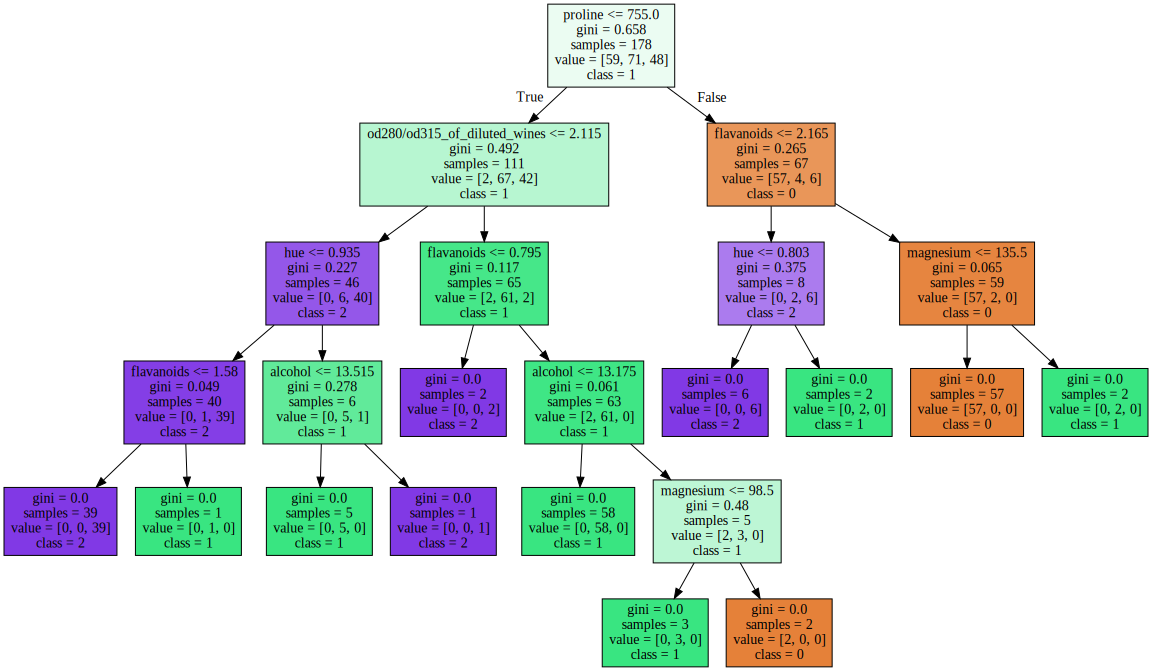

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…